# Features and labels in the dataset
* age - Age of patients
* sex - Sex of patients
* cp - Chest pain type
* trestbps - Resting blood pressure
* chol - Serum cholesterol
* fbs - Fasting blood sugar
* restecg - Resting electrographic results
* thalachh - Maximum heart rate achieved
* exng - Exercise induced angina
* oldpeak - ST depression induced by exercise relative to rest
* slp - Slope of the peak
* caa - Coronary Artery Anomalies
* thall - Defect type


## Importing required libraries

In [84]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

pio.renderers.default = "png"

In [2]:
pd.options.display.float_format = '{:,.16f}'.format

## Data manipulation

### Read the data set

In [3]:
# read the data
data_path = '../data/data.csv'
df = pd.read_csv(data_path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.2999999999999998,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000000000000000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.3999999999999999,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000000000000000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000000000000000,2,0,2,1


### Basic Data Checking

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000,303.0000000000000000
mean,54.3663366336633658,0.6831683168316832,0.9669966996699670,131.6237623762376359,246.2640264026402690,0.1485148514851485,0.5280528052805280,149.6468646864686605,0.3267326732673267,1.0396039603960396,1.3993399339933994,0.7293729372937293,2.3135313531353137,0.5445544554455446
std,9.0821009898378566,0.4660108233396238,1.0320524894832985,17.5381428135171014,51.8307509879300312,0.3561978749279764,0.5258595963592980,22.9051611149140939,0.4697944645223165,1.1610750220686348,0.6162261453459619,1.0226063649693271,0.6122765072781409,0.4988347841643913
min,29.0000000000000000,0.0000000000000000,0.0000000000000000,94.0000000000000000,126.0000000000000000,0.0000000000000000,0.0000000000000000,71.0000000000000000,0.0000000000000000,0.0000000000000000,0.0000000000000000,0.0000000000000000,0.0000000000000000,0.0000000000000000
25%,47.5000000000000000,0.0000000000000000,0.0000000000000000,120.0000000000000000,211.0000000000000000,0.0000000000000000,0.0000000000000000,133.5000000000000000,0.0000000000000000,0.0000000000000000,1.0000000000000000,0.0000000000000000,2.0000000000000000,0.0000000000000000
50%,55.0000000000000000,1.0000000000000000,1.0000000000000000,130.0000000000000000,240.0000000000000000,0.0000000000000000,1.0000000000000000,153.0000000000000000,0.0000000000000000,0.8000000000000000,1.0000000000000000,0.0000000000000000,2.0000000000000000,1.0000000000000000
75%,61.0000000000000000,1.0000000000000000,2.0000000000000000,140.0000000000000000,274.5000000000000000,0.0000000000000000,1.0000000000000000,166.0000000000000000,1.0000000000000000,1.6000000000000001,2.0000000000000000,1.0000000000000000,3.0000000000000000,1.0000000000000000
max,77.0000000000000000,1.0000000000000000,3.0000000000000000,200.0000000000000000,564.0000000000000000,1.0000000000000000,2.0000000000000000,202.0000000000000000,1.0000000000000000,6.2000000000000002,2.0000000000000000,4.0000000000000000,3.0000000000000000,1.0000000000000000


In [7]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [8]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.0000000000000000,-0.0984466024747938,-0.0686530158401454,0.2793509065612880,0.2136779565595619,0.1213076480933747,-0.1162108981585295,-0.3985219381210681,0.0968008264552681,0.2100125673586740,-0.1688142380120961,0.2763262440191394,0.0680013770546520,-0.2254387158748384
sex,-0.0984466024747938,1.0000000000000000,-0.0493528753469894,-0.0567688239696438,-0.1979121741411069,0.0450317891935604,-0.0581962677037548,-0.0440199077695747,0.1416638109915056,0.0960928770677390,-0.0307105673031726,0.1182614133203601,0.2100410956372072,-0.2809365755017668
cp,-0.0686530158401454,-0.0493528753469894,1.0000000000000000,0.0476077606446491,-0.0769043910332076,0.0944440349953314,0.0444205925101639,0.2957621245879107,-0.3942802684950218,-0.1492301580970810,0.1197165885347065,-0.1810530260534954,-0.1617355705100224,0.4337982615068944
trtbps,0.2793509065612880,-0.0567688239696438,0.0476077606446491,1.0000000000000000,0.1231742065323905,0.1775305419344599,-0.1141027863918701,-0.0466977281479538,0.0676161195387633,0.1932164724095358,-0.1214745819264496,0.1013889853005509,0.0622098876308611,-0.1449311284977500
chol,0.2136779565595619,-0.1979121741411069,-0.0769043910332076,0.1231742065323905,1.0000000000000000,0.0132936022516715,-0.1510400783375122,-0.0099398386426981,0.0670227825739426,0.0539519199869938,-0.0040377703696838,0.0705109252260760,0.0988029925001451,-0.0852391051375690
fbs,0.1213076480933747,0.0450317891935604,0.0944440349953314,0.1775305419344599,0.0132936022516715,1.0000000000000000,-0.0841890544310268,-0.0085671073434869,0.0256651472021262,0.0057472234596444,-0.0598941782904180,0.1379793270278513,-0.0320193393134976,-0.0280457602727130
restecg,-0.1162108981585295,-0.0581962677037548,0.0444205925101639,-0.1141027863918701,-0.1510400783375122,-0.0841890544310268,1.0000000000000000,0.0441234440854370,-0.0707328558723666,-0.0587702263198371,0.0930448209744822,-0.0720424332469300,-0.0119814045998064,0.1372295028737732
thalachh,-0.3985219381210681,-0.0440199077695747,0.2957621245879107,-0.0466977281479538,-0.0099398386426981,-0.0085671073434869,0.0441234440854370,1.0000000000000000,-0.3788120938514863,-0.3441869479667161,0.3867844098148193,-0.2131769281153894,-0.0964391316598208,0.4217409338106742
exng,0.0968008264552681,0.1416638109915056,-0.3942802684950218,0.0676161195387633,0.0670227825739426,0.0256651472021262,-0.0707328558723666,-0.3788120938514863,1.0000000000000000,0.2882228077827655,-0.2577483685301665,0.1157393780705061,0.2067537877395375,-0.4367570833533032
oldpeak,0.2100125673586740,0.0960928770677390,-0.1492301580970810,0.1932164724095358,0.0539519199869938,0.0057472234596444,-0.0587702263198371,-0.3441869479667161,0.2882228077827655,1.0000000000000000,-0.5775368167291409,0.2226823218278235,0.2102441259826487,-0.4306960016873686


In [85]:
corr_data = df.corr()
x = corr_data.columns
y = corr_data.index
values = np.array(corr_data)

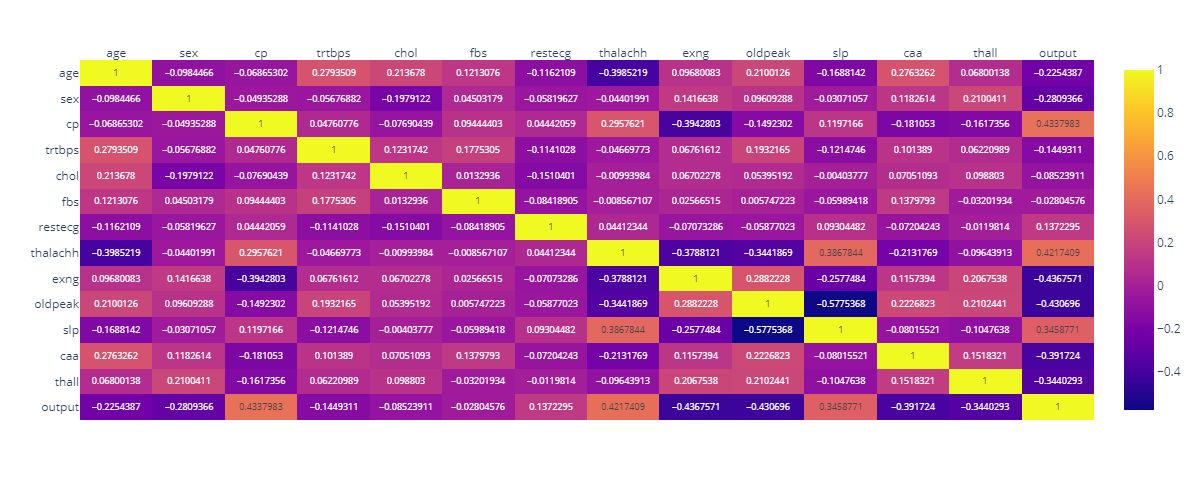

In [86]:
fig = px.imshow(img=values, x=x, y=y, text_auto=True, aspect='auto', width=1200)
fig.update_xaxes(side='top')
fig.show()

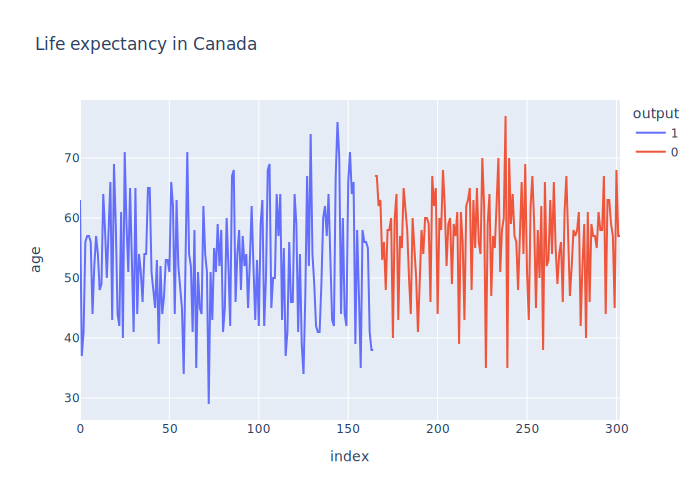

In [14]:
fig = px.line(df, y='age', color='output', title='Life expectancy in Canada')
fig.show()

In [15]:
output_count = df.groupby('output').agg(output_count = ('output', 'count')).reset_index()
output_count['output'] = output_count['output'].astype('string')
output_count

,output,output_count
0,0,138
1,1,165


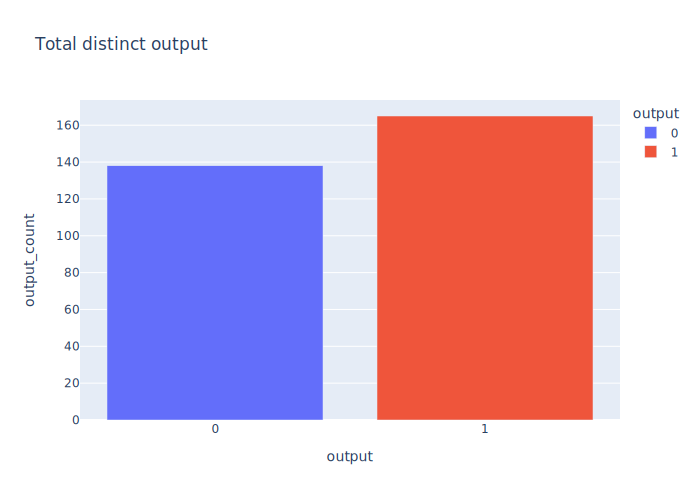

In [16]:
fig = px.bar(output_count, x='output', y='output_count', color = 'output', title='Total distinct output')
fig.show()

In [17]:
age_count = df.groupby('age').agg(age_count = ('age', 'count')).reset_index()
age_count['age'] = age_count['age'].astype('string')
age_count.head()

,age,age_count
0,29,1
1,34,2
2,35,4
3,37,2
4,38,3


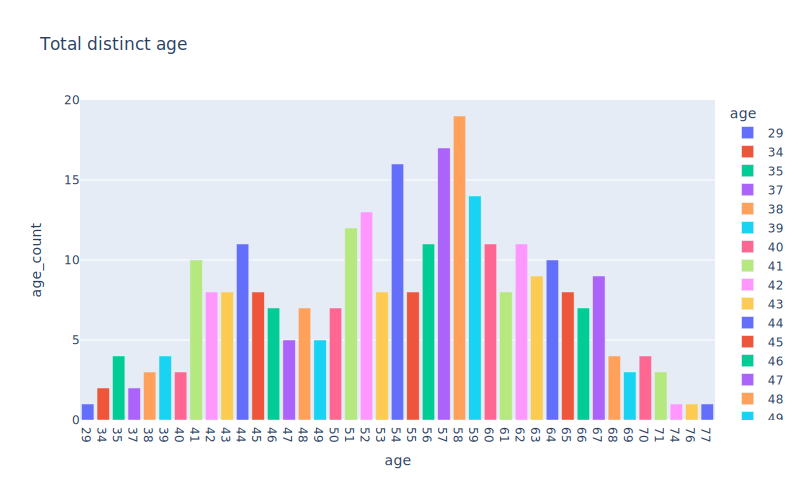

In [19]:
fig = px.bar(age_count, x='age', y='age_count', color='age', title='Total distinct age', width=800)
fig.show()

## Machine Learning Algorithm

In [20]:
x = df.drop('output', axis=1)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.2999999999999998,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5000000000000000,0,0,2
2,41,0,1,130,204,0,0,172,0,1.3999999999999999,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8000000000000000,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6000000000000000,2,0,2


In [21]:
y = df['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [23]:
ml_algorithms = {}

### Logistic Regression

In [24]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [25]:
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# accuracy
log_model.score(x_train, y_train)

0.8636363636363636

In [27]:
# predict
predict_log_model = log_model.predict(x_test)
predict_log_model

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [28]:
cm_log_model = metrics.confusion_matrix(y_test, predict_log_model)
print(cm_log_model)

[[25  4]
 [ 3 29]]


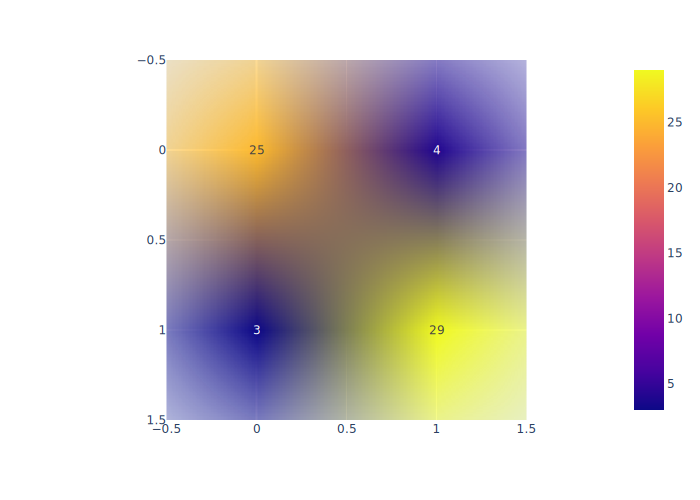

In [29]:
fig = px.imshow(img=cm_log_model, text_auto=True)
fig.show()

In [30]:
tp,fn,fp,tn = cm_log_model.reshape(-1)
print(tp,fn,fp,tn)

25 4 3 29


In [31]:
# accuracy calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.8852459016393442

In [32]:
precision = tp / (tp + fp)
precision

0.8928571428571429

In [33]:
sensitivity = tp / (tp + fn)
sensitivity

0.8620689655172413

In [34]:
Specificity = tn / (tn + fp)
Specificity

0.90625

In [35]:
f1_score = (precision + sensitivity) / 2
f1_score

0.8774630541871922

In [36]:
report_predict_log_model = classification_report(y_test, predict_log_model)
print(report_predict_log_model)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
log_model_accuracy = accuracy_score(y_test, predict_log_model)
log_model_accuracy

0.8852459016393442

In [38]:
ml_algorithms['Logistic Regression'] = log_model_accuracy

### KNeighbors Classifier

In [39]:
kn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
kn_classifier.fit(x_train, y_train) 

KNeighborsClassifier()

In [40]:
predict_kn_classifier = kn_classifier.predict(x_test)

In [41]:
cm_kn_classifier = confusion_matrix(y_test, predict_kn_classifier)
cm_kn_classifier

array([[18, 11],
       [ 8, 24]], dtype=int64)

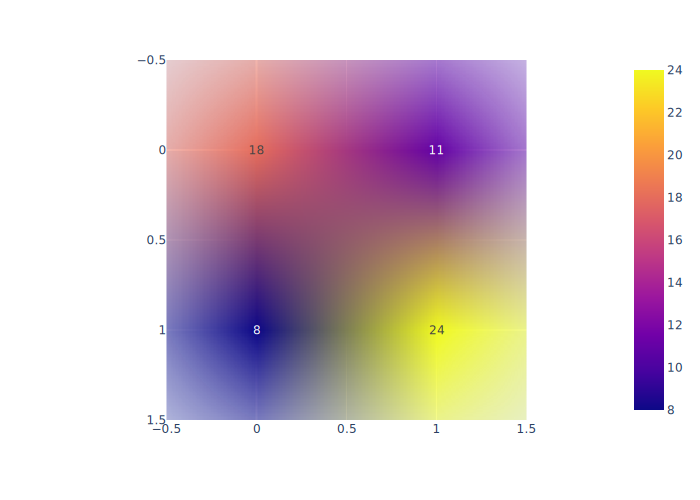

In [42]:
fig = px.imshow(img=cm_kn_classifier, text_auto=True)
fig.show()

In [43]:
report_predict_kn_classifier = classification_report(y_test, predict_kn_classifier)
print(report_predict_kn_classifier)

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [44]:
kn_classifier_accuracy = accuracy_score(y_test, predict_kn_classifier)
kn_classifier_accuracy

0.6885245901639344

In [45]:
ml_algorithms['KNeighbors Classifier'] = kn_classifier_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'KNeighbors Classifier': 0.6885245901639344}


### Random Forest Classifier

In [46]:
rf_classifier = RandomForestClassifier(n_estimators= 10, criterion='entropy')
rf_classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [47]:
predict_rf_classifier = rf_classifier.predict(x_test)

In [48]:
cm_rf_classifier = confusion_matrix(y_test, predict_rf_classifier)
cm_rf_classifier

array([[25,  4],
       [ 5, 27]], dtype=int64)

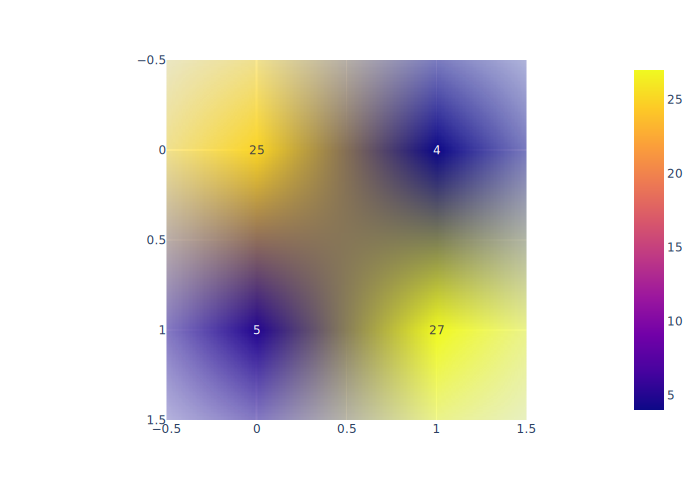

In [49]:
fig = px.imshow(img=cm_rf_classifier, text_auto=True)
fig.show()

In [50]:
report_predict_rf_classifier = classification_report(y_test, predict_rf_classifier)
print(report_predict_rf_classifier)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [51]:
rf_classifier_accuracy = accuracy_score(y_test, predict_rf_classifier)
rf_classifier_accuracy

0.8524590163934426

In [52]:
ml_algorithms['Random Forest Classifier'] = rf_classifier_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'KNeighbors Classifier': 0.6885245901639344, 'Random Forest Classifier': 0.8524590163934426}


### Decision Tree Algorithm

In [53]:
dt_classifier = DecisionTreeClassifier()

In [54]:
dt_classifier.fit(x,y)

DecisionTreeClassifier()

[Text(0.5104166666666666, 0.9545454545454546, 'cp <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(0.2638888888888889, 0.8636363636363636, 'caa <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.16666666666666666, 0.7727272727272727, 'thall <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.09259259259259259, 0.6818181818181818, 'exng <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.037037037037037035, 0.5909090909090909, 'thalachh <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05555555555555555, 0.5, 'chol <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(0.037037037037037035, 0.4090909090909091, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.07407407407407407, 0.4090909090909091, 'slp <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = 

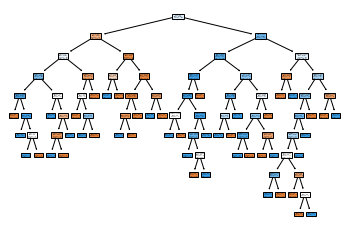

In [55]:
tree.plot_tree(dt_classifier,filled=True, feature_names=x.columns)

In [56]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
dt_classifier.score(x_train, y_train)

1.0

In [58]:
dt_classifier.score(x_test, y_test)

0.8524590163934426

In [59]:
predict_dt_classifier = dt_classifier.predict(x_test)
predict_dt_classifier

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
cm_dt_classifier = confusion_matrix(y_test, predict_dt_classifier)
cm_dt_classifier

array([[27,  2],
       [ 7, 25]], dtype=int64)

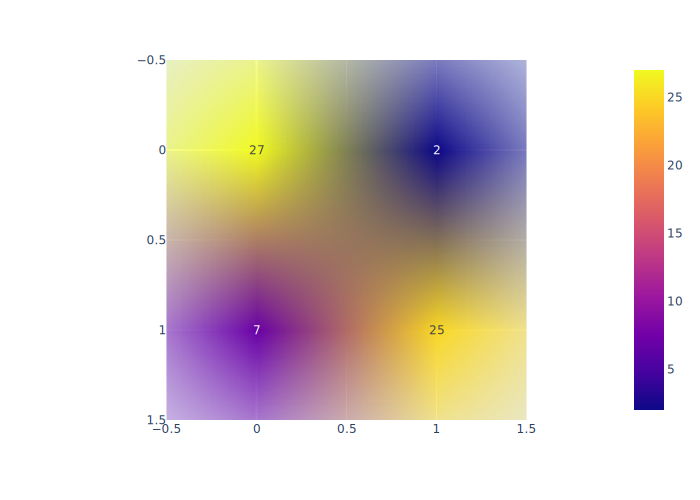

In [61]:
fig = px.imshow(img=cm_dt_classifier, text_auto=True)
fig.show()

In [62]:
report_predict_dt_classifier = classification_report(y_test, predict_dt_classifier)
print(report_predict_dt_classifier)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [63]:
dt_classifier_accuracy = accuracy_score(y_test, predict_dt_classifier)
dt_classifier_accuracy

0.8524590163934426

In [64]:
ml_algorithms['Decision Tree'] = dt_classifier_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'KNeighbors Classifier': 0.6885245901639344, 'Random Forest Classifier': 0.8524590163934426, 'Decision Tree': 0.8524590163934426}


### Support Vector Machine

In [65]:
svm = SVC(kernel='linear')

In [66]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [67]:
svm.score(x_test, y_test)

0.8688524590163934

In [68]:
predict_svm = svm.predict(x_test)  
predict_svm

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
cm_svm = confusion_matrix(y_test, predict_svm)
cm_svm

array([[25,  4],
       [ 4, 28]], dtype=int64)

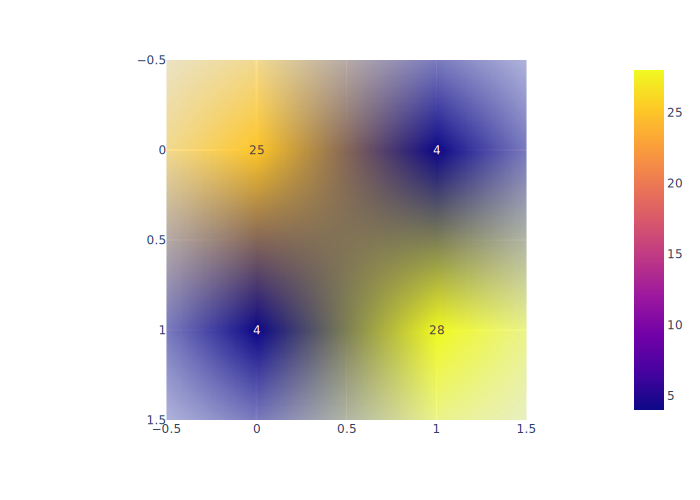

In [70]:
fig = px.imshow(img=cm_svm, text_auto=True)
fig.show()

In [71]:
report_predict_svm = classification_report(y_test, predict_svm)
print(report_predict_svm)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [72]:
svm_accuracy = accuracy_score(y_test, predict_svm)
svm_accuracy

0.8688524590163934

In [73]:
ml_algorithms['Support Vector Machine'] = svm_accuracy
print(ml_algorithms)

{'Logistic Regression': 0.8852459016393442, 'KNeighbors Classifier': 0.6885245901639344, 'Random Forest Classifier': 0.8524590163934426, 'Decision Tree': 0.8524590163934426, 'Support Vector Machine': 0.8688524590163934}


### Machine Learning Algorithms Summary

In [74]:
data_ml_algorithms = {
    'algorithms': list(ml_algorithms.keys()),
    'accuracy': list(ml_algorithms.values())
}

df_algorithms = pd.DataFrame(data_ml_algorithms)
df_algorithms

,algorithms,accuracy
0,Logistic Regression,0.8852459016393442
1,KNeighbors Classifier,0.6885245901639344
2,Random Forest Classifier,0.8524590163934426
3,Decision Tree,0.8524590163934426
4,Support Vector Machine,0.8688524590163934


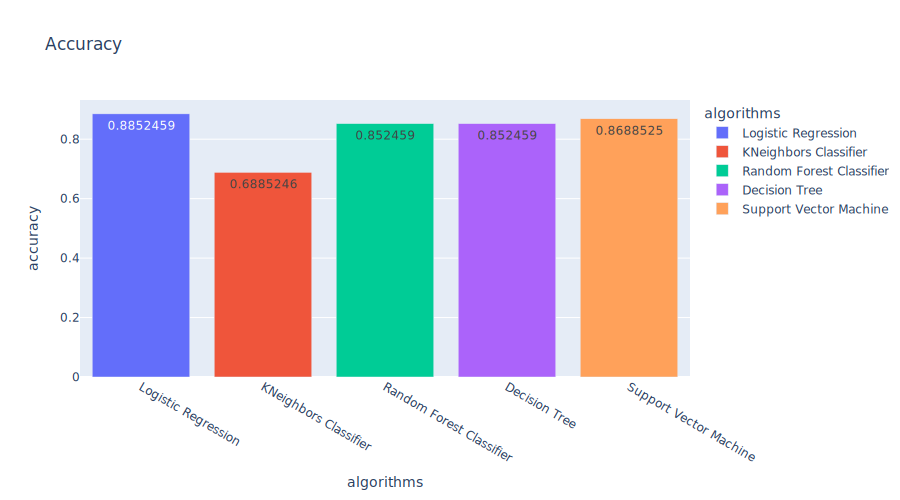

In [77]:
fig = px.bar(df_algorithms,
             x='algorithms',
             y='accuracy',
             title='Accuracy',
             color='algorithms',
             text_auto=True,
             hover_data={'accuracy': ':.16r'},
             height=500,
             width=900)
fig.show()